In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Gonnuru/Admission_Prediction/master/Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Drop unrelevant variables

In [5]:
df = df.drop(['Serial No.'], axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Define x and y

In [6]:
x = df.drop(['Chance of Admit'], axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [7]:
y = df['Chance of Admit']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

## Train Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [23]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit, Length: 100, dtype: float64

## Define Model

In [18]:
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
lr = LinearRegression()

In [19]:
# Use the model to fit the data
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)
lr.fit(x_train, y_train)

LinearRegression()

## Predict

In [28]:
r_pred = ridge.predict(x_test).flatten()
l_pred = lasso.predict(x_test).flatten()
e_pred = elastic.predict(x_test).flatten()
y_pred = lr.predict(x_test).flatten()

In [29]:
lr_pred = y_pred

In [31]:
from contextlib import redirect_stderr
all_pred = pd.DataFrame({'Actual ': y_test,
                         'Linear Regression ': lr_pred,
                         'Ridge ': r_pred,
                         'Lasso ': l_pred,
                         'ElasticNet ': e_pred})

all_pred = all_pred.reset_index().iloc[:, 1:]
all_pred

,Actual,Linear Regression,Ridge,Lasso,ElasticNet
0,0.93,0.914575,0.913680,0.761874,0.833374
1,0.84,0.795181,0.793951,0.718222,0.706931
2,0.39,0.572660,0.574796,0.720405,0.713254
3,0.77,0.707370,0.706634,0.713857,0.694287
4,0.74,0.815883,0.815181,0.744413,0.782797
...,...,...,...,...,...
95,0.42,0.435631,0.435692,0.685483,0.612100
96,0.72,0.686643,0.687514,0.720405,0.713254
97,0.72,0.785988,0.786907,0.750961,0.801763
98,0.67,0.734694,0.734275,0.726952,0.732220


## Visualization

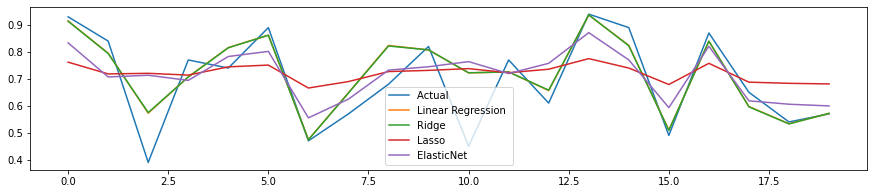

In [32]:
all_pred.head(20).plot(kind = 'line', figsize=(15, 3))

## Model Evaluation

In [34]:
model = ['Linear Regression',
         'Ridge',
         'Lassso',
         'ElasticNet']
model_pred = [lr_pred,
              r_pred,
              l_pred,
              e_pred]
mse = []
mae = []
rmse = []
r2_score = []

for i in range(len(model)):
  mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
  mse.append(metrics.mean_squared_error(y_test, model_pred[i]))
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))
  r2_score.append(metrics.r2_score(y_test, model_pred[i]))

pd.DataFrame({'MSE':mse,
              'MAE':mae,
              'RMSE':rmse,
              'R2_score':r2_score},
             index = model).sort_values('RMSE')

,MSE,MAE,RMSE,R2_score
Linear Regression,0.003705,0.042723,0.060866,0.818843
Ridge,0.003722,0.042878,0.061011,0.817979
ElasticNet,0.009145,0.074972,0.095629,0.552815
Lassso,0.015227,0.097780,0.123398,0.255405
